In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
def transform_to_date(x):
    try:
        return datetime.strptime(str(x), "%m/%d/%Y")
    except Exception as e:
        print(e)     
#日內波動(Garman,1980)
def inday_sigma(df):
    u = np.log(df.High/df.Open)
    d = np.log(df.Low/df.Open)
    c = np.log(df.Close/df.Open)
    sigma = 0.511*(u-d)*(u-d) - 0.019*(c*(u+d)-2*u*d) - 0.383*c*c
    sigma = (sigma**0.5) * 100
    return sigma
#日內波動(ATR)
def TR(df):
    a = np.abs(df.High-df.Low).dropna()
    b = np.abs(df.High-df.Close.shift(1)).dropna()
    c = np.abs(df.Low-df.Close.shift(1)).dropna()
    TR = pd.concat([a,b,c],axis=1)
    TR = TR.max(axis=1)
    return TR

In [3]:
CA = pd.read_csv('元大/future data/ES.csv')
CA['Date'] = CA['Date'].map(lambda x: transform_to_date(x))
CA.set_index('Date' , inplace = True)
CA.drop('Tick Count' , axis = 1 , inplace = True)

CA['sigma'] = inday_sigma(CA)
CA['TR'] = TR(CA)
CA['return'] = 100 * CA['Close'].pct_change().dropna()
CA.dropna(axis = 0 ,inplace = True)
#CA.drop(['Open','High','Low','Volume','sigma'] , axis = 1 , inplace = True)
CA

,Open,High,Low,Close,Volume,sigma,TR,return
Date,,,,,,,,
2015-01-05,2045.75,2048.25,2009.50,2018.00,2032027,1.047960,38.75,-1.380574
2015-01-06,2019.00,2023.50,1984.25,1995.25,2343053,1.172860,39.25,-1.127354
2015-01-07,1996.50,2023.75,1995.75,2020.25,1749707,0.651720,28.50,1.252976
2015-01-08,2020.50,2058.50,2020.25,2054.00,1550237,0.838643,38.25,1.670585
2015-01-09,2053.75,2062.00,2031.25,2033.50,1906796,0.864614,30.75,-0.998053
...,...,...,...,...,...,...,...,...
2020-06-30,3046.00,3101.25,3030.25,3084.75,1648311,1.436237,71.00,1.272160
2020-07-01,3085.25,3117.75,3062.75,3100.75,1500951,1.220827,55.00,0.518681
2020-07-02,3101.75,3156.50,3095.50,3125.75,1512449,1.297043,61.00,0.806257


In [4]:
max(CA['TR'])

331.5

In [531]:
#處理極端值 cal_loss反而更高
for i in range(CA.shape[0]):
    if CA['TR'][i] <= CA['TR'].quantile(0.5) :
        CA['TR'][i] = None

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


24.0


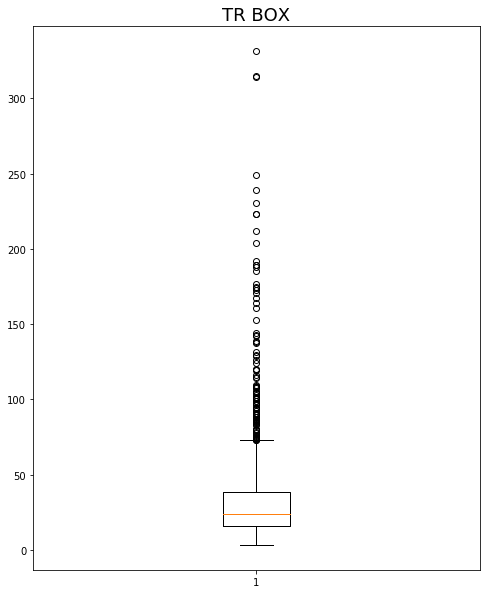

In [64]:
print(CA['TR'].quantile(0.5))
plt.figure(figsize = (8,10))
plt.boxplot(CA['TR'].dropna())
plt.title('TR BOX' , fontsize = 18)
plt.show()

In [533]:
CA.tail(20)

,Open,High,Low,Close,Volume,sigma,TR,return
Date,,,,,,,,
2020-06-09,3227.75,3231.00,3190.00,3205.25,1622888,0.791955,NaN,-0.666305
2020-06-10,3204.75,3227.25,3179.75,3184.00,1899775,0.969558,NaN,-0.662975
2020-06-11,3183.75,3188.50,2996.25,3013.75,3166101,2.752846,192.25,-5.347048
2020-06-12,3011.75,3087.75,2982.00,3035.75,2144934,2.418212,105.75,0.729988
2020-06-15,2992.75,3079.25,2935.00,3076.50,1001898,2.930395,144.25,1.342337
2020-06-16,3076.25,3167.75,3071.25,3126.50,648973,1.944711,96.50,1.625223
2020-06-17,3122.00,3157.75,3105.00,3117.50,245431,1.191718,52.75,-0.287862
2020-06-18,3104.00,3120.00,3064.50,3099.25,1438004,1.268842,55.50,-0.585405
2020-06-19,3096.75,3144.75,3056.75,3057.75,1886176,1.852265,88.00,-1.339034


Google Trends 變數

In [5]:
keywords_fix = pd.read_csv('元大/GT_daily/keywords_fix_daily.csv' , index_col='date')
#print((keywords_fix == 0).astype(int).sum(axis = 0))
#print(keywords_fix.isna().sum())
keywords_fix.shape

(2034, 98)

In [6]:
Domestictrend = pd.read_csv('元大/GT_daily/Domestictrend_daily.csv', index_col='date')
#大於1000個 NAN 或 0 就drop掉
Domestictrend.drop(['autoby' , 'durble' , 'furntr' , 'autofi' , 'comput' , 'crcard' , 'educat' , 'smallbiz'] , axis = 1 , inplace = True)
#Domestictrend['cross mean D'] = Domestictrend.mean(axis = 1)
#print((Domestictrend==0).astype(int).sum(axis = 0))
#print(Domestictrend.isna().sum())
Domestictrend.shape

(2034, 9)

In [7]:
台指期 = pd.read_csv('元大/GT_daily/台指期貨_daily.csv' ,index_col='date')
台指期['cross mean'] = 台指期.mean(axis = 1)

In [8]:
A50 = pd.read_csv('元大/GT_daily/A50指數_daily.csv' ,index_col='date')
A50.drop(['Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'] , axis = 1 ,inplace = True)
A50['cross mean'] = A50.mean(axis = 1)

In [9]:
星日經 = pd.read_csv('元大/GT_daily/星日經指數_daily.csv' ,index_col='date')
星日經.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'] , axis = 1 ,inplace = True)
星日經['cross mean'] = 星日經.mean(axis = 1)

In [10]:
小SP = pd.read_csv('元大/GT_daily/小SP指數_daily.csv' ,index_col='date')
小SP['cross mean'] = 小SP.mean(axis = 1)
小SP.drop(['s&pfutures' , 's&p500 stock' , 's&p 500 today' , 's&p 500 stock price' , 's&p 500 chart'] ,axis = 1  , inplace = True)
#print((小SP==0).astype(int).sum(axis = 0))
#print(小SP.isna().sum())

In [11]:
DAX = pd.read_csv('元大/GT_daily/DAX指數_daily.csv' ,index_col='date')
DAX['cross mean'] = DAX.mean(axis = 1)

In [12]:
FTSE100 = pd.read_csv('元大/GT_daily/FTSE100指數_daily.csv' ,index_col='date')
FTSE100['cross mean'] = FTSE100.mean(axis = 1)

In [13]:
CAC40 = pd.read_csv('元大/GT_daily/CAC40指數_daily.csv' ,index_col='date')
CAC40['cross mean'] = CAC40.mean(axis = 1)

合併資料

In [14]:
data_CA = pd.concat([CA , 小SP] ,axis=1)
data_CA = pd.concat([data_CA , Domestictrend] ,axis=1)
data_CA = pd.concat([data_CA , keywords_fix] ,axis=1)
data_CA.dropna(axis=0 , inplace = True)
data_CA['TR forcast1'] = data_CA['TR'].shift(-1)
data_CA.dropna(axis=0 , inplace = True)
#data_CA.drop(['cross mean'],axis = 1 ,inplace = True)
data_CA

,Open,High,Low,Close,Volume,sigma,TR,return,s&p 500,s&p 500 index,...,crash,transaction,garden,fond,train,labor,fun,environment,ring,TR forcast1
2015-01-05,2045.75,2048.25,2009.50,2018.00,2032027.0,1.047960,38.75,-1.380574,48.0,51.0,...,26,73,70,85,67,65,49,53,74,39.25
2015-01-06,2019.00,2023.50,1984.25,1995.25,2343053.0,1.172860,39.25,-1.127354,64.0,74.0,...,31,77,66,72,77,76,58,67,79,28.50
2015-01-07,1996.50,2023.75,1995.75,2020.25,1749707.0,0.651720,28.50,1.252976,38.0,64.0,...,27,79,64,68,71,60,42,70,70,38.25
2015-01-08,2020.50,2058.50,2020.25,2054.00,1550237.0,0.838643,38.25,1.670585,69.0,100.0,...,18,72,66,80,69,56,47,49,76,30.75
2015-01-09,2053.75,2062.00,2031.25,2033.50,1906796.0,0.864614,30.75,-0.998053,55.0,47.0,...,19,68,67,43,73,54,45,50,72,33.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29,2986.25,3051.25,2983.50,3046.00,1550097.0,0.994055,67.75,1.431901,24.0,35.0,...,14,90,72,54,37,51,65,32,83,71.00
2020-06-30,3046.00,3101.25,3030.25,3084.75,1648311.0,1.436237,71.00,1.272160,23.0,33.0,...,8,95,68,52,31,50,71,39,78,55.00
2020-07-01,3085.25,3117.75,3062.75,3100.75,1500951.0,1.220827,55.00,0.518681,83.0,95.0,...,86,95,79,76,63,73,51,100,77,61.00
2020-07-02,3101.75,3156.50,3095.50,3125.75,1512449.0,1.297043,61.00,0.806257,93.0,92.0,...,73,97,97,84,88,78,49,64,84,33.00


In [402]:
#data_CA.to_csv('data_CA')

In [15]:
#去掉波動小
data_CA1 = pd.concat([CA , 小SP] ,axis=1)
data_CA1 = pd.concat([data_CA , Domestictrend] ,axis=1)
data_CA1 = pd.concat([data_CA , keywords_fix] ,axis=1)
data_CA1.dropna(axis=0 , inplace = True)
data_CA1['TR forcast1'] = data_CA['TR'].shift(-1)
data_CA1.dropna(axis=0 , inplace = True)
#data_CA.drop(['cross mean'],axis = 1 ,inplace = True)
data_CA1

,Open,High,Low,Close,Volume,sigma,TR,return,s&p 500,s&p 500 index,...,home,crash,transaction,garden,fond,train,labor,fun,environment,ring
2015-01-05,2045.75,2048.25,2009.50,2018.00,2032027.0,1.047960,38.75,-1.380574,48.0,51.0,...,100,26,73,70,85,67,65,49,53,74
2015-01-06,2019.00,2023.50,1984.25,1995.25,2343053.0,1.172860,39.25,-1.127354,64.0,74.0,...,98,31,77,66,72,77,76,58,67,79
2015-01-07,1996.50,2023.75,1995.75,2020.25,1749707.0,0.651720,28.50,1.252976,38.0,64.0,...,92,27,79,64,68,71,60,42,70,70
2015-01-08,2020.50,2058.50,2020.25,2054.00,1550237.0,0.838643,38.25,1.670585,69.0,100.0,...,87,18,72,66,80,69,56,47,49,76
2015-01-09,2053.75,2062.00,2031.25,2033.50,1906796.0,0.864614,30.75,-0.998053,55.0,47.0,...,86,19,68,67,43,73,54,45,50,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,3071.25,3082.00,2992.50,3003.00,2147089.0,1.540476,89.50,-2.293802,25.0,30.0,...,84,13,91,86,48,50,34,62,23,61
2020-06-29,2986.25,3051.25,2983.50,3046.00,1550097.0,0.994055,67.75,1.431901,24.0,35.0,...,91,14,90,72,54,37,51,65,32,83
2020-06-30,3046.00,3101.25,3030.25,3084.75,1648311.0,1.436237,71.00,1.272160,23.0,33.0,...,96,8,95,68,52,31,50,71,39,78
2020-07-01,3085.25,3117.75,3062.75,3100.75,1500951.0,1.220827,55.00,0.518681,83.0,95.0,...,100,86,95,79,76,63,73,51,100,77


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: divide by zero encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


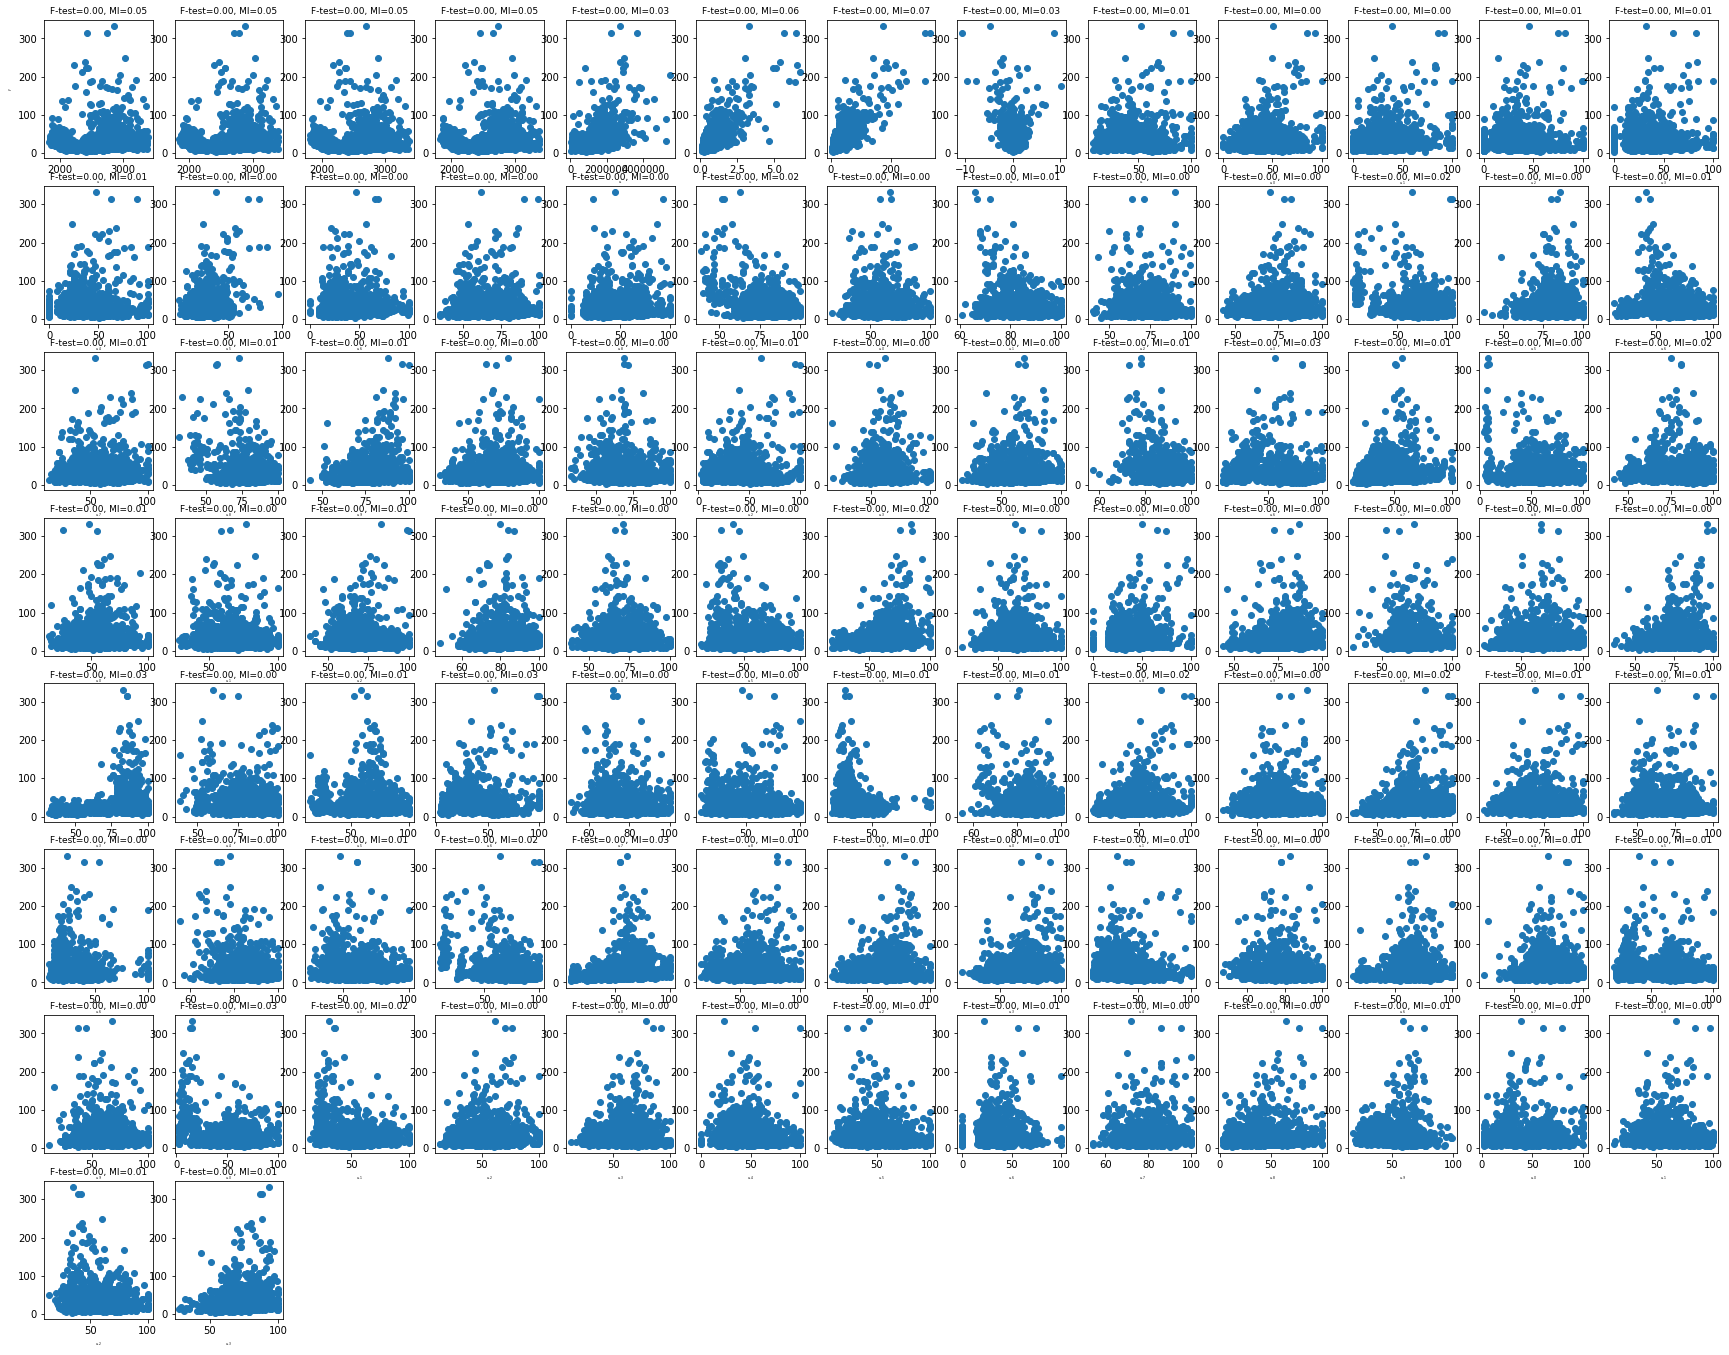

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

X = data_CA.iloc[:,0:123]
y = data_CA.iloc[:,122:123]

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(30, 30))
for i in range(93):
    plt.subplot(10, 13, i + 1)
    plt.scatter(X.iloc[:, i], y)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=3)
    if i == 0:
        plt.ylabel("$y$", fontsize=3)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=9)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:304: RuntimeWarning: divide by zero encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


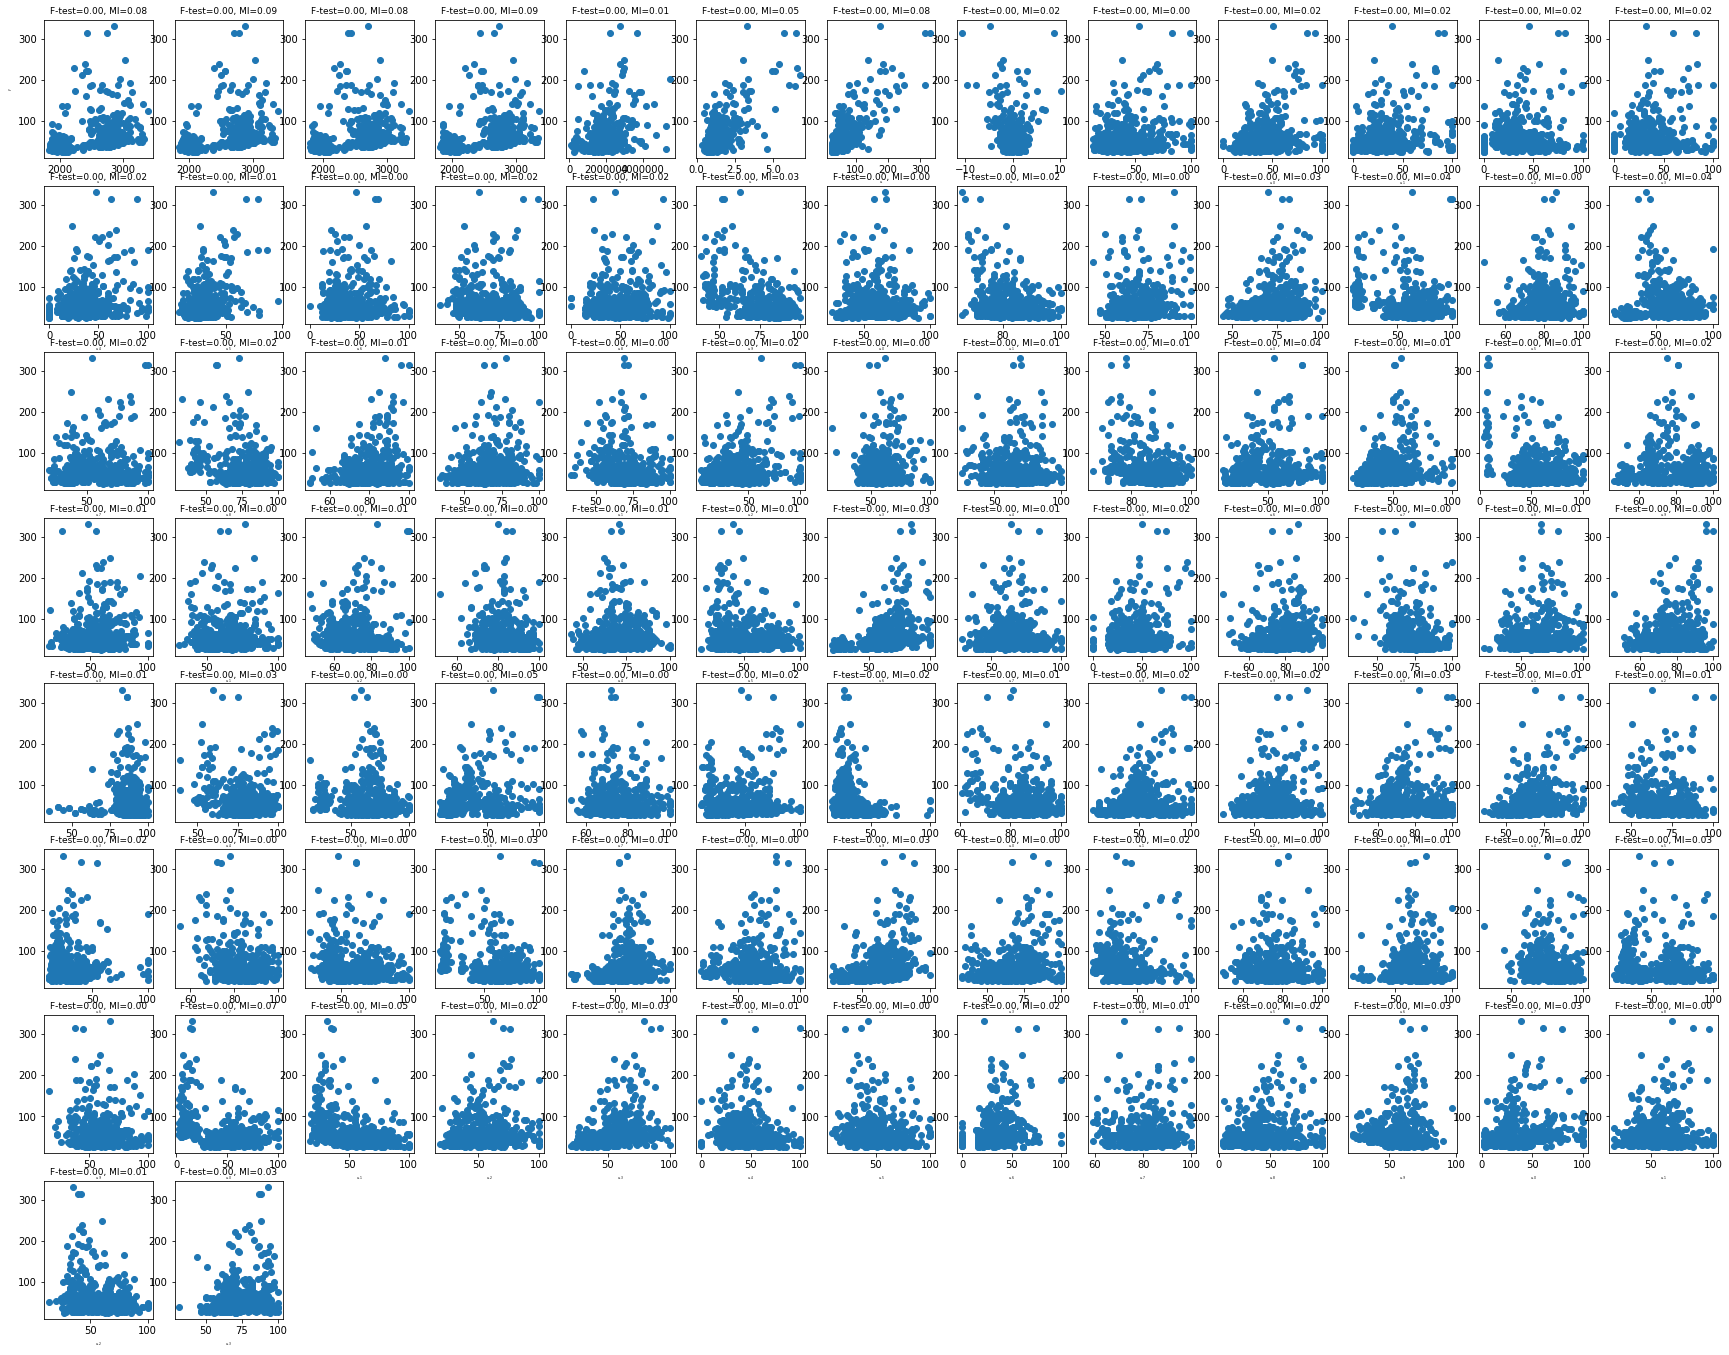

In [535]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression

X = data_CA.iloc[:,0:123]
y = data_CA.iloc[:,122:123]

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

plt.figure(figsize=(30, 30))
for i in range(93):
    plt.subplot(10, 13, i + 1)
    plt.scatter(X.iloc[:, i], y)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=3)
    if i == 0:
        plt.ylabel("$y$", fontsize=3)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=9)
plt.show()

In [17]:
data_CA.drop(['TR forcast1'] , axis = 1 , inplace = True)

嘗試LSTM

In [18]:
import os

import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, Activation, Flatten, TimeDistributed, RepeatVector
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.optimizers import Adam
%matplotlib inline

Using TensorFlow backend.


In [19]:
#正規化
def normalize(train):
    a = np.max(train)
    b = np.min(train)
    c = np.mean(train)
    #train = train.drop(["Date"], axis=1)    
    train_norm = train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
    return train_norm

In [20]:
#設定train ,forcast
def buildTrain(train, pastDay, futureDay):
    X_train, Y_train = [], []
    for i in range(train.shape[0]-futureDay-pastDay):
        X_train.append(np.array(train.iloc[i:i+pastDay]))
        Y_train.append(np.array(train.iloc[i+pastDay:i+pastDay+futureDay]["TR"]))
    return np.array(X_train), np.array(Y_train)

In [21]:
#亂序
def shuffle(X,Y):
    np.random.seed(87)
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]

In [22]:
#Vaildation
def splitData(X,Y,rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val

In [50]:
#處理資料
train = data_CA

#train_Aug
train_norm = normalize(train)
X_train, Y_train = buildTrain(train_norm, 10, 1)

# shuffle the data, and random seed is 10
X_train, Y_train = shuffle(X_train, Y_train)

# split training data and validation data
X_train, Y_train, X_val, Y_val = splitData(X_train, Y_train, 0.1)

In [51]:
def inv_normalize(train_norm , train):
    a = np.max(train)
    b = np.min(train)
    c = np.mean(train)
    train_norm = pd.DataFrame(train_norm)
    train_inv = train_norm.apply(lambda x : x * (a - b) + c )
    return train_inv

In [52]:
#建立模型
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(16, input_length=shape[1], input_dim=shape[2]))
    #model.add(LSTM(6, input_length=shape[1], input_dim=shape[2]))
    model.add(Dense(6))
    # output shape: (1, 1)
    model.add(Dense(1))
    model.compile(loss="mean_absolute_error", optimizer=Adam(lr=0.0001))
    model.summary()
    return model

In [53]:
epochs = [50,100,200,500,1000]
batch_size = [16,32,64,128]
pastdays = [5,10,20]

In [54]:
#record = []
#for j in epochs:
#    for i in batch_size:
model = buildManyToOneModel(X_train.shape)
callback = EarlyStopping(monitor="loss", patience=5, verbose=1, mode="auto")
history = model.fit(X_train, 
                    Y_train, 
                    epochs = 1000, 
                    batch_size = 64, 
                    validation_data=(X_val, Y_val), 
                    callbacks=[callback])
#        record.append(history.history['val_loss'][-1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, input_shape=(10, 122))`
  after removing the cwd from sys.path.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 16)                8896      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 9,005
Trainable params: 9,005
Non-trainable params: 0
_________________________________________________________________
Train on 1269 samples, validate on 140 samples
Epoch 1/1000
1269/1269 [==============================] - 1s 492us/step - loss: 0.2378 - val_loss: 0.2007
Epoch 2/1000
1269/1269 [==============================] - 0s 129us/step - loss: 0.1959 - val_loss: 0.1635
Epoch 3/1000
1269/1269 [==============================] - 0s 110us/step - loss: 0.1622 - val_loss: 0.1374
Epoch 4/1000
1269

In [62]:
#record = pd.DataFrame(np.array(record).reshape(4,4))
#record

In [48]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)

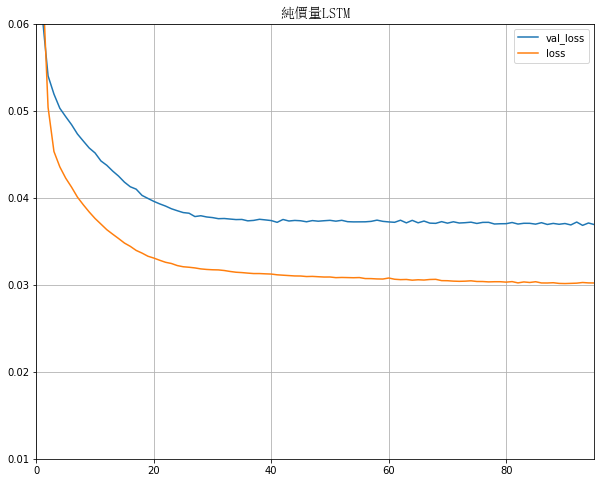

In [49]:
##純價量 0.0379
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(10,8))
    plt.grid(True)
    plt.gca().set_ylim(0.01,0.06)
    plt.title('純價量LSTM', fontproperties=font )
    plt.show()

plot_learning_curves(model.history)

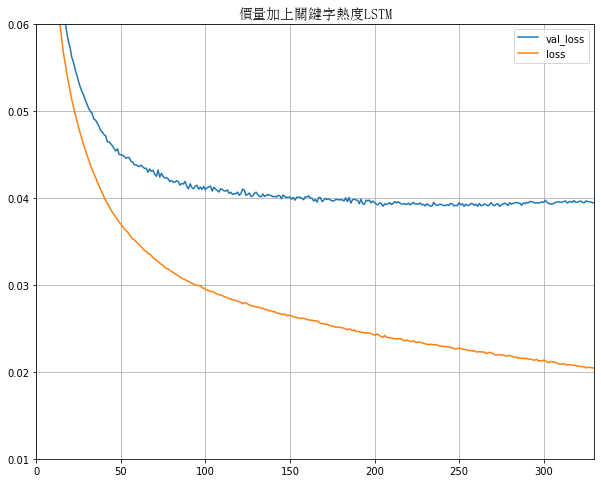

In [56]:
#加上Domestic 和 指數關鍵字 0.0353
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(10,8))
    plt.grid(True)
    plt.gca().set_ylim(0.01,0.06)
    plt.title('價量加上關鍵字熱度LSTM', fontproperties=font )
    plt.show()

plot_learning_curves(model.history)

In [166]:
inv_normalize(Y_predict , data_CA['sigma'])

,0
0,2.095273
1,0.607624
2,0.932836
3,0.946492
4,0.509258
...,...
135,1.511723
136,1.028849
137,1.148426
138,0.658695


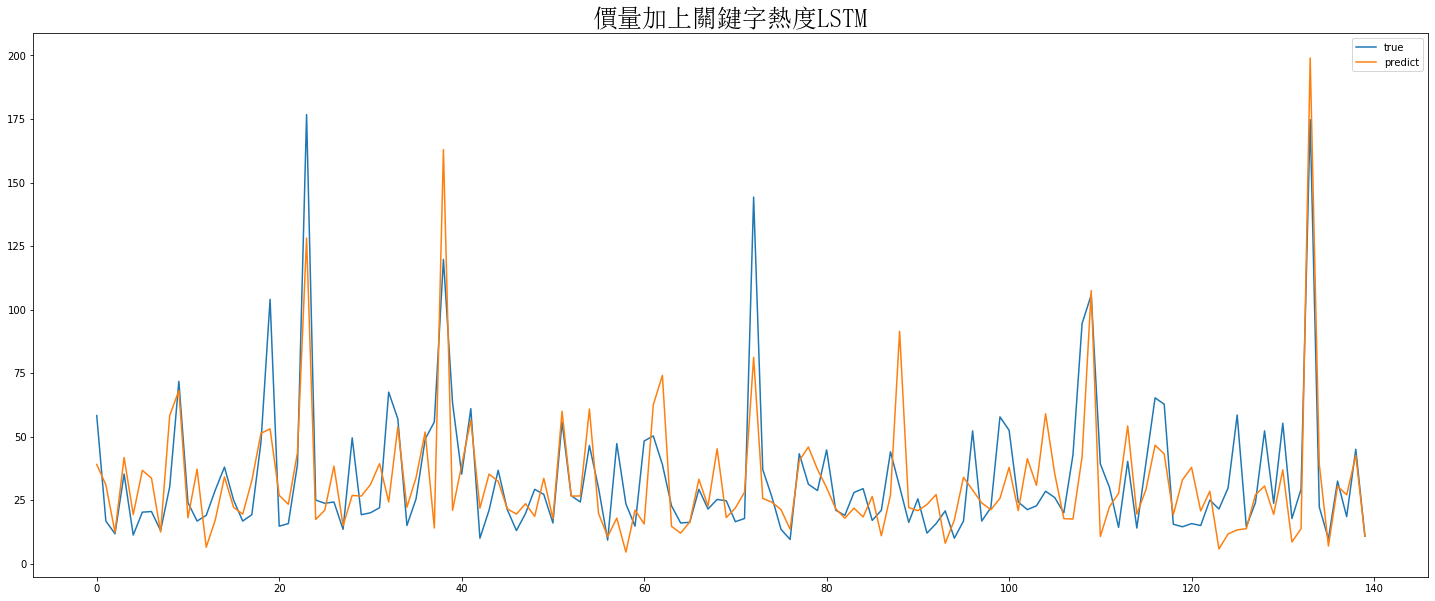

In [61]:
Y_predict = model.predict(X_val)
plt.figure(figsize = (25,10))
plt.plot(inv_normalize(Y_val,data_CA['TR']) , label = 'true')
plt.plot(inv_normalize(Y_predict,data_CA['TR']) , label = 'predict')
plt.title('價量加上關鍵字熱度LSTM', fontproperties=font ,fontsize = 25)
plt.legend()